In [2]:
import os
from modules.analyze_session_stats import analyze_session_stats
import pandas as pd
import matplotlib.pyplot as plt
# 1) List your CSVs and titles
DATASETS = [
    'Resampled/BTCUSD_30m.csv',
    'Resampled/BTCUSD_1h.csv',
    'Resampled/BTCUSD_1d.csv',
]
TITLES = [
    '30-Minute',
    '1-Hour',
    '1-Day',
]

# 2) Where to put the session stats
OUTPUT_FOLDER = 'AnalysisResults'

# ensure the output directory exists
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# run the analysis for each timeframe
for csv_path, title in zip(DATASETS, TITLES):
    analyze_session_stats(csv_path, title, OUTPUT_FOLDER)


C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\analyze_session_stats.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(



=== Session Stats: 30-Minute ===
                            range               ATR_14               \
                             mean      max        mean          max   
session                                                               
Asia                   232.659434  8275.86  254.526839  1840.324286   
Asia + London Overlap  216.729907  2418.55  224.594006  1576.157857   
London                 237.794038  6587.35  220.578151  1917.249286   
London + NY Overlap    334.919418  5764.05  250.061313  2187.215000   
New York               300.402494  5306.71  296.749285  3014.570714   
Other                  263.320979  7083.76  291.696949  2285.768571   

                      price_return              abs_return              \
                              mean         std        mean         std   
session                                                                  
Asia                     -0.186088  199.577402  112.139546  165.092108   
Asia + London Overlap     0.63

C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\analyze_session_stats.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(



=== Session Stats: 1-Hour ===
                            range               ATR_14               \
                             mean      max        mean          max   
session                                                               
Asia                   334.240223  8275.86  394.689749  3550.540000   
Asia + London Overlap  313.647185  3235.56  354.631348  2163.305714   
London                 341.435623  7442.23  340.669253  2291.030000   
London + NY Overlap    486.927490  7394.21  347.338429  2529.571429   
New York               430.333580  6783.34  373.687706  3151.238571   
Other                  376.829785  7083.76  401.971920  3434.988571   

                      price_return              abs_return              \
                              mean         std        mean         std   
session                                                                  
Asia                     -0.510991  279.105455  157.217392  230.609787   
Asia + London Overlap     1.21433

C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\analyze_session_stats.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


→ saved plot: AnalysisResults\candle range_dist_1-Day.png
→ saved plot: AnalysisResults\candle return_dist_1-Day.png
→ saved plot: AnalysisResults\atr_14_dist_1-Day.png
→ saved plot: AnalysisResults\range efficiency_dist_1-Day.png


In [3]:
%load_ext autoreload
%autoreload 2


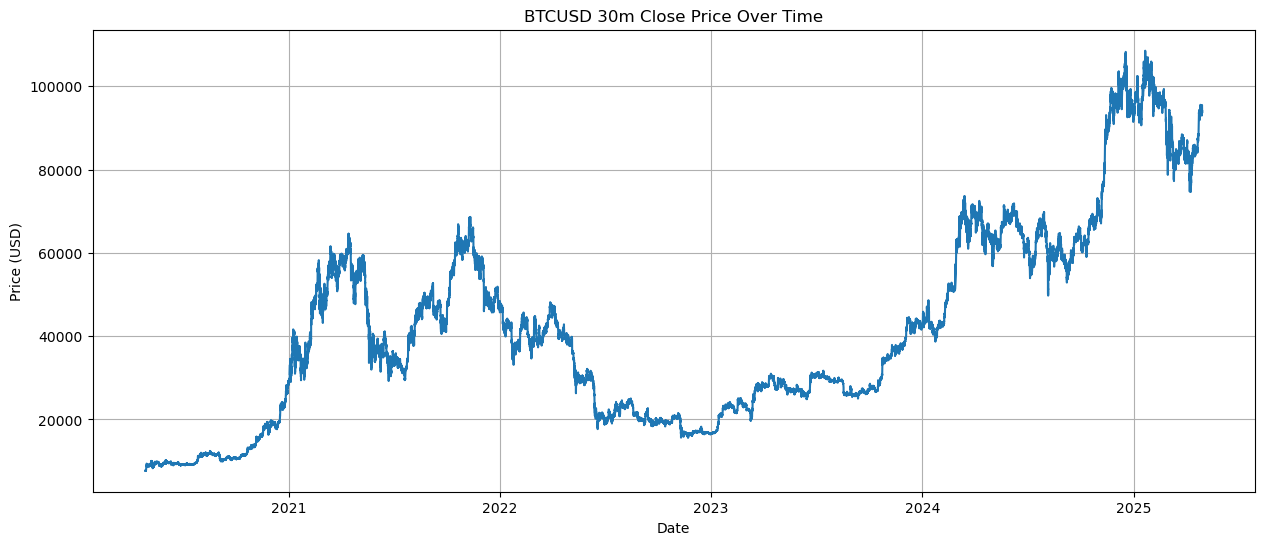

In [4]:
# Load your dataset
df = pd.read_csv('./Resampled/BTCUSD_30m.csv', index_col=0, parse_dates=True)

# Line chart
plt.figure(figsize=(15,6))
plt.plot(df.index, df['close'])
plt.title('BTCUSD 30m Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


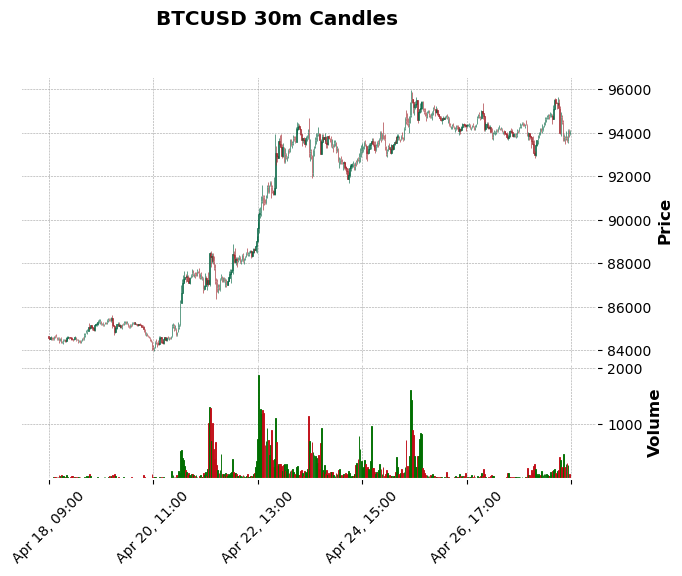

In [5]:
import mplfinance as mpf

# Load your dataset
df = pd.read_csv('./Resampled/BTCUSD_30m.csv', index_col=0, parse_dates=True)

# For mplfinance, dataframe must have columns: Open, High, Low, Close (capitalized)
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Plot candlestick chart
mpf.plot(df[-500:], type='candle', style='charles', title='BTCUSD 30m Candles', volume=True)


C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\timeframe_processor.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\timeframe_processor.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\timeframe_processor.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict


=== Combined Session Movement and Volatility Stats ===
                 session   range_mean  range_max  ATR_14_mean   ATR_14_max  \
0                   Asia   232.659434    8275.86   254.526839  1840.324286   
1  Asia + London Overlap   216.729907    2418.55   224.594006  1576.157857   
2                 London   237.794038    6587.35   220.578151  1917.249286   
3    London + NY Overlap   334.919418    5764.05   250.061313  2187.215000   
4               New York   300.402494    5306.71   296.749285  3014.570714   
5                  Other   263.320979    7083.76   291.696949  2285.768571   
0                   Asia   334.240223    8275.86   394.689749  3550.540000   
1  Asia + London Overlap   313.647185    3235.56   354.631348  2163.305714   
2                 London   341.435623    7442.23   340.669253  2291.030000   
3    London + NY Overlap   486.927490    7394.21   347.338429  2529.571429   
4               New York   430.333580    6783.34   373.687706  3151.238571   
5       

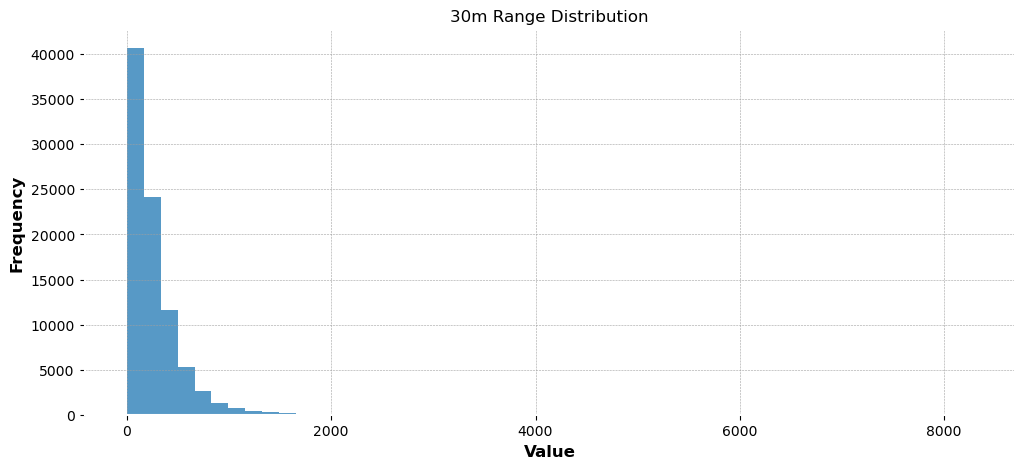

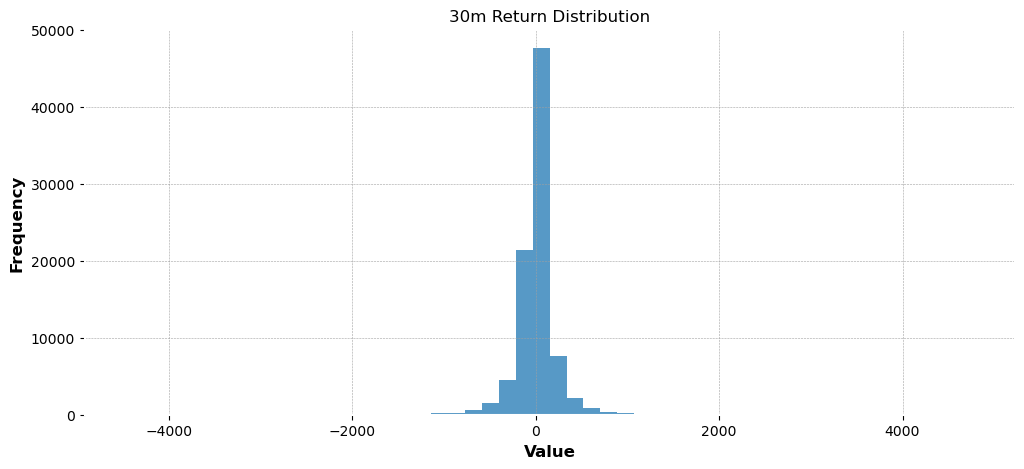

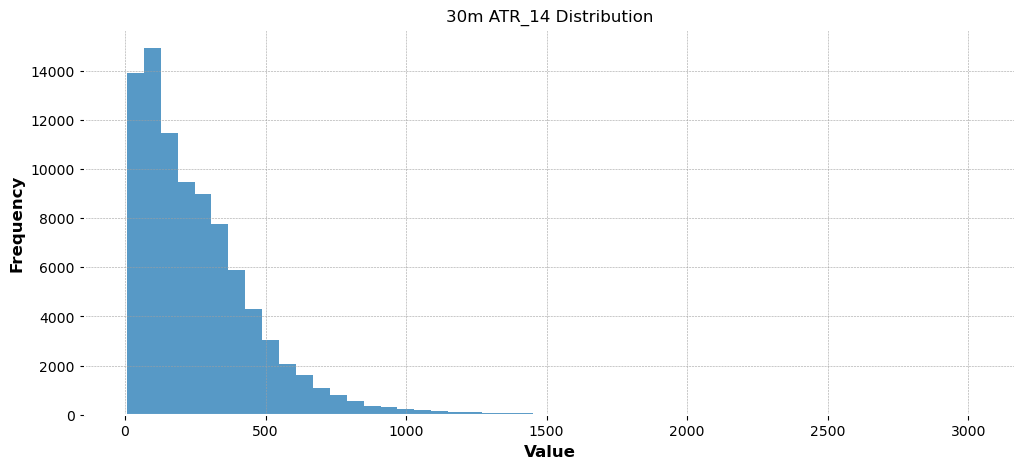

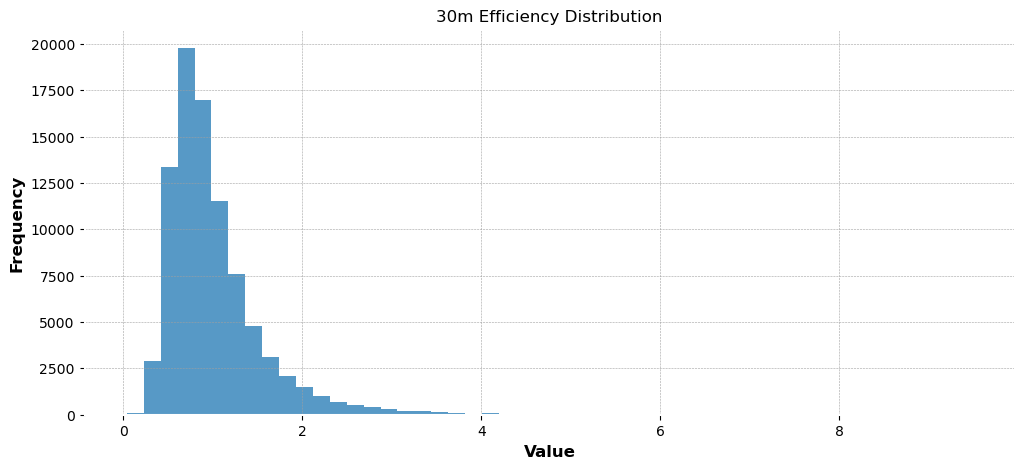

In [6]:
# main_runner.ipynb
import sys
sys.path.append('./')

# --- Setup Imports ---
import pandas as pd
from modules.timeframe_processor import process_timeframe
from visualization.plot_distributions import plot_distribution

# --- Process Each Timeframe ---
# Process all timeframes
df_30m, stats_30m = process_timeframe('./Resampled/BTCUSD_30m.csv', '30m')
df_1h, stats_1h = process_timeframe('./Resampled/BTCUSD_1h.csv', '1h')
df_1d, stats_1d = process_timeframe('./Resampled/BTCUSD_1d.csv', '1d')

# Combine all stats
all_stats = pd.concat([stats_30m, stats_1h, stats_1d])
all_stats.to_csv('./AnalysisResults/session_metrics_all_timeframes.csv')


# --- View Results ---
print("\n=== Combined Session Movement and Volatility Stats ===")
print(all_stats)

# --- Save Results ---
all_stats.to_csv('./AnalysisResults/session_metrics_all_timeframes.csv')
print("✅ Combined session stats saved to ./AnalysisResults/session_metrics_all_timeframes.csv")

# --- Plot Distributions (Optional) ---
# You can now plot for any df easily!
plot_distribution(df_30m['range'], '30m Range Distribution')
plot_distribution(df_30m['price_return'], '30m Return Distribution')
plot_distribution(df_30m['ATR_14'], '30m ATR_14 Distribution')
plot_distribution(df_30m['efficiency'], '30m Efficiency Distribution')

# Same thing can be done for 1h, 1d if needed


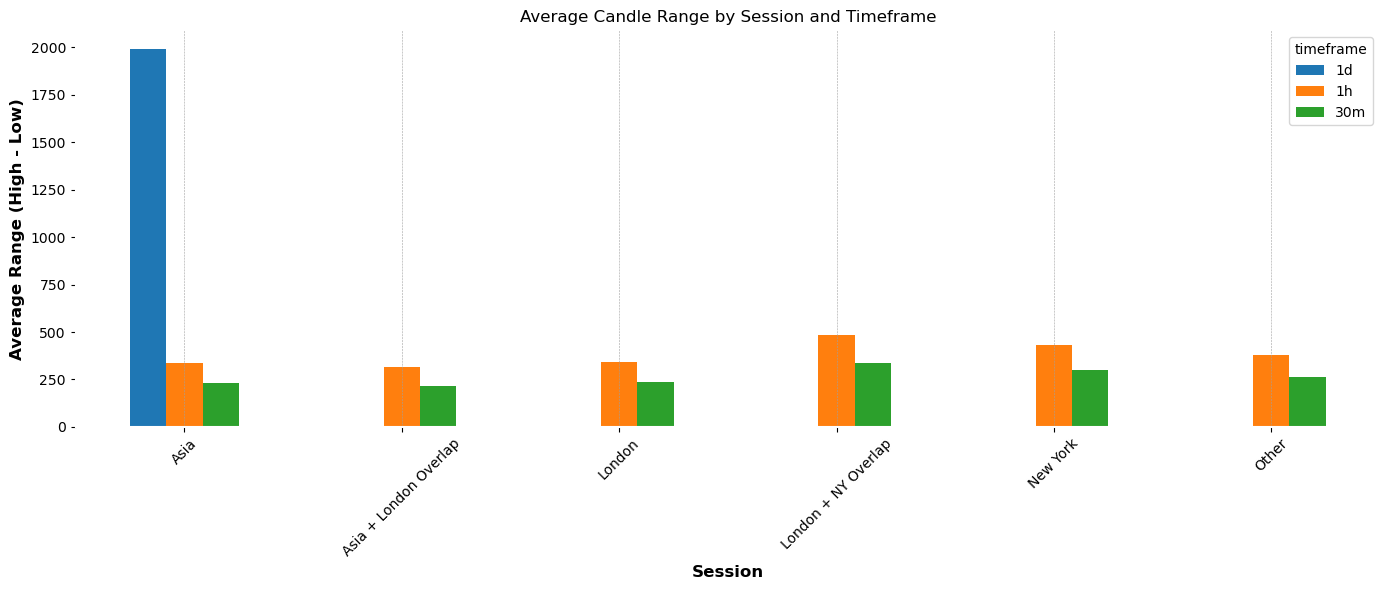

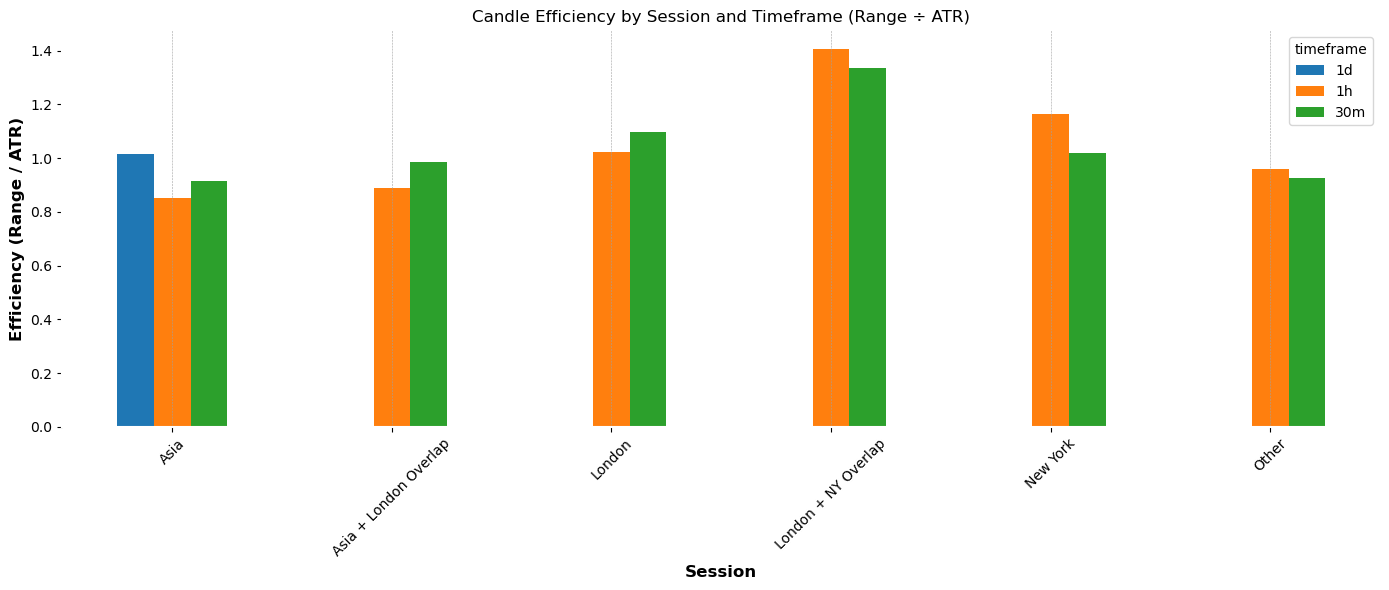

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the correct session metrics file
df = pd.read_csv('./AnalysisResults/session_metrics_all_timeframes.csv')  # ✅ Correct path

# Reset index and clean
df = df.reset_index(drop=True)
df = df.dropna(subset=['range_mean', 'efficiency_mean', 'timeframe', 'session'])

# --- Plot 1: Average Range ---
pivot_range = df.pivot(index='session', columns='timeframe', values='range_mean')
pivot_range.plot(kind='bar', figsize=(14, 6), title='Average Candle Range by Session and Timeframe')
plt.ylabel('Average Range (High - Low)')
plt.xlabel('Session')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- Plot 2: Range Efficiency ---
pivot_eff = df.pivot(index='session', columns='timeframe', values='efficiency_mean')
pivot_eff.plot(kind='bar', figsize=(14, 6), title='Candle Efficiency by Session and Timeframe (Range ÷ ATR)')
plt.ylabel('Efficiency (Range / ATR)')
plt.xlabel('Session')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [8]:
from modules.session_aggregator import build_session_ohlc

# make sure all your price columns are lowercase
df_30m.columns = [col.lower() for col in df_30m.columns]

# --- Build session-level candles from 30m data ---
session_df = build_session_ohlc(df_30m)          # no 'timeframe' arg here
# if you want to tag the timeframe in the output:
session_df['timeframe'] = '30m'

session_df.to_csv(
    './AnalysisResults/session_candles_from_30m.csv',
    index=False
)
print("✅ Session-level candles saved to ./AnalysisResults/session_candles_from_30m.csv")


✅ Session-level candles saved to ./AnalysisResults/session_candles_from_30m.csv


In [9]:
print(df_30m.columns.tolist())


['open', 'high', 'low', 'close', 'volume', 'session', 'range', 'price_return', 'abs_return', 'atr_14', 'efficiency']


In [10]:
import pandas as pd
from modules.metrics_calculator import calculate_movement_metrics

# --- Load session‐level candles ---
session_df = pd.read_csv(
    './AnalysisResults/session_candles_from_30m.csv'
)

# --- Standardize column names to lowercase ---
session_df.rename(columns=str.lower, inplace=True)

# --- Drop any sessions missing a valid range ---
session_df.dropna(subset=['range'], inplace=True)

# --- Recompute movement & volatility metrics for session bars ---
# This will add:
#   - 'price_return'
#   - 'abs_return'
#   - 'ATR_14'
#   - 'efficiency'
session_df = calculate_movement_metrics(
    session_df,
    atr_window=14
)

# --- (Optional) alias price_return back to 'return' if you need it ---
session_df['return'] = session_df['price_return']

# --- Final cleaning of infinities & NaNs ---
session_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
session_df.dropna(inplace=True)

# --- Group by session and compute summary stats ---
session_stats = session_df.groupby('session').agg({
    'range':        ['mean','max'],
    'ATR_14':       ['mean','max'],
    'price_return': ['mean','std'],
    'abs_return':   ['mean','std'],
    'efficiency':   'mean'
})

# Flatten the MultiIndex and round to 2 decimal places
session_stats.columns = ['_'.join(col) for col in session_stats.columns]
session_stats = session_stats.round(2)

# --- Print and save results ---
print("=== Corrected Session‐Level Daily Stats ===")
print(session_stats)

session_stats.to_csv(
    './AnalysisResults/session_level_daily_stats.csv'
)


=== Corrected Session‐Level Daily Stats ===
                       range_mean  range_max  ATR_14_mean  ATR_14_max  \
session                                                                 
Asia                       935.94   11543.09       764.45     4010.01   
Asia + London Overlap      313.79    3235.56       731.37     3998.87   
London                     778.97    9083.67       720.29     3798.20   
London + NY Overlap        707.45    8035.00       748.43     4025.65   
New York                   988.88   10111.23       763.48     3850.78   
Other                      773.84    7522.11       768.22     3906.67   

                       price_return_mean  price_return_std  abs_return_mean  \
session                                                                       
Asia                               -4.26            751.21           426.75   
Asia + London Overlap               1.22            262.68           152.89   
London                             25.56            608

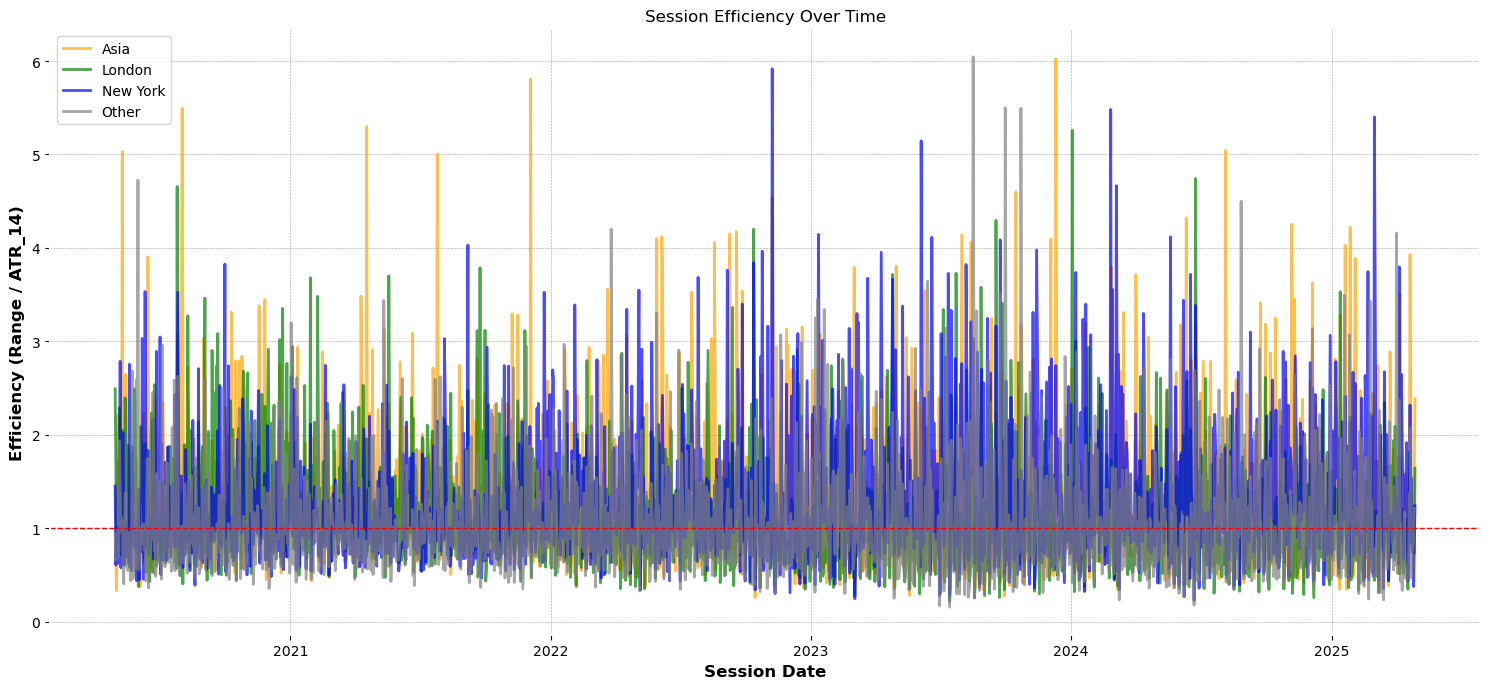

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from modules.metrics_calculator import calculate_movement_metrics

# --- Load session-level candles and index on the date ---
session_df = pd.read_csv(
    './AnalysisResults/session_candles_from_30m.csv',
    parse_dates=['date']
)
session_df.set_index('date', inplace=True)
session_df.sort_index(inplace=True)

# --- Drop any sessions missing a valid range ---
session_df.dropna(subset=['range'], inplace=True)

# --- Recompute movement & volatility metrics on session bars ---
# This will add: price_return, abs_return, ATR_14, efficiency
session_df = calculate_movement_metrics(session_df, atr_window=14)

# --- Optional alias: if you still need a 'return' column ---
session_df['return'] = session_df['price_return']

# --- Clean up infinities and NaNs ---
session_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
session_df.dropna(inplace=True)

# --- Prepare for plotting ---
# Use the datetime index ('date') as the x‐axis
sessions = ['Asia', 'London', 'New York', 'Other']
colors   = {'Asia': 'orange', 'London': 'green', 'New York': 'blue', 'Other': 'gray'}

plt.figure(figsize=(15, 7))
for sess in sessions:
    data = session_df[session_df['session'] == sess]
    plt.plot(
        data.index,
        data['efficiency'],
        label=sess,
        color=colors.get(sess, 'black'),
        alpha=0.7
    )

# horizontal line at efficiency = 1.0
plt.axhline(1.0, color='red', linestyle='--', linewidth=1)

plt.title('Session Efficiency Over Time')
plt.xlabel('Session Date')
plt.ylabel('Efficiency (Range / ATR_14)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from modules.session_labeler import label_and_save_sessions

# 1h data
raw_1h, feat_1h = label_and_save_sessions(
    './Resampled/BTCUSD_1h.csv',  # file_path
    'BTCUSD_1h',                  # output_prefix
    timestamp_col='time',
    output_base='./Resampled'
)

# 30m data
raw_30m, feat_30m = label_and_save_sessions(
    './Resampled/BTCUSD_30m.csv',
    'BTCUSD_30m',
    timestamp_col='time',
    output_base='./Resampled'
)

# 1d data
raw_1d, feat_1d = label_and_save_sessions(
    './Resampled/BTCUSD_1d.csv',
    'BTCUSD_1d',
    timestamp_col='time',
    output_base='./Resampled'
)

print("✅ Labeled & saved raw/feature CSVs for 1h, 30m, and 1d data.")


✅ Labeled & saved raw/feature CSVs for 1h, 30m, and 1d data.


In [13]:
from modules.timestamp_features import add_timestamp_features
from modules.volatility_features import add_volatility_features


# --- 30m ---
df_30m = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'], index_col='time')
df_30m = add_timestamp_features(df_30m)
df_30m = add_volatility_features(df_30m)
df_30m.to_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')

# --- 1h ---
df_1h = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv', parse_dates=['time'], index_col='time')
df_1h = add_timestamp_features(df_1h)
df_1h = add_volatility_features(df_1h)
df_1h.to_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv')

# --- 1d ---
df_1d = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv', parse_dates=['time'], index_col='time')
df_1d = add_volatility_features(df_1d) 
df_1d.to_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv')


In [14]:

df = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')
print(df.columns)


Index(['time', 'open', 'high', 'low', 'close', 'volume', 'session', 'date',
       'time_of_day', 'hour', 'minute', 'weekday', 'month', 'range',
       'price_return', 'abs_return', 'ATR_14', 'efficiency', 'range_change',
       'efficiency_change', 'volatility_spike', 'rolling_volatility_std'],
      dtype='object')


In [15]:
import pandas as pd
from modules.timestamp_features import add_timestamp_features
from modules.volatility_features import add_volatility_features
from modules.combined_features import (
    add_session_structure_features,
    add_candle_structure_features,
    add_trend_continuation_features,
    add_structure_zone_features,
    add_meta_composite_features
)

# === Load 30m data ===
df_30m = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'], index_col='time')

# === Apply all feature layers ===
df_30m = add_timestamp_features(df_30m)
df_30m = add_volatility_features(df_30m)
df_30m = add_session_structure_features(df_30m)
df_30m = add_candle_structure_features(df_30m)
df_30m = add_trend_continuation_features(df_30m)
df_30m = add_structure_zone_features(df_30m)
df_30m = add_meta_composite_features(df_30m)

# === Save updated dataset ===
df_30m.to_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')
print("✅ All features added and saved to BTCUSD_30m_features.csv")


✅ All features added and saved to BTCUSD_30m_features.csv


In [16]:
# === 1H Timeframe ===
df_1h = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv', parse_dates=['time'], index_col='time')
df_1h = add_timestamp_features(df_1h)
df_1h = add_volatility_features(df_1h)
df_1h = add_session_structure_features(df_1h)
df_1h = add_candle_structure_features(df_1h)
df_1h = add_trend_continuation_features(df_1h)
df_1h = add_structure_zone_features(df_1h)
df_1h = add_meta_composite_features(df_1h)
df_1h.to_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv')
print("✅ 1h features saved.")

# === 1D Timeframe ===
df_1d = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv', parse_dates=['time'], index_col='time')
# ⛔ Skip timestamp features — daily already represents 1 point per day
df_1d = add_volatility_features(df_1d)
df_1d = add_session_structure_features(df_1d)
df_1d = add_candle_structure_features(df_1d)
df_1d = add_trend_continuation_features(df_1d)
df_1d = add_structure_zone_features(df_1d)
df_1d = add_meta_composite_features(df_1d)
df_1d.to_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv')
print("✅ 1d features saved.")

✅ 1h features saved.
✅ 1d features saved.


In [17]:
print(df_30m.iloc[0])

open                                        7768.04
high                                        7774.99
low                                         7752.33
close                                       7752.36
volume                                   281.525999
session                         London + NY Overlap
date                                     2020-04-28
time_of_day                                13:00:00
hour                                             13
minute                                            0
weekday                                           1
month                                             4
range                                         22.66
price_return                                 -15.68
abs_return                                    15.68
ATR_14                                    24.574286
efficiency                                 0.922102
range_change                                    NaN
efficiency_change                               NaN
volatility_s

In [18]:
import pandas as pd

from modules.timestamp_features       import add_timestamp_features
from modules.volatility_features      import add_volatility_features
from modules.session_labeler          import add_session_labels
from modules.combined_features        import (
    add_session_structure_features,
    add_candle_structure_features,
    add_trend_continuation_features,
    add_structure_zone_features,
    add_meta_composite_features
)
from modules.support_resistance_features import (
    add_support_resistance_features,
    assign_active_range
)
from modules.trap_pattern_detector      import flag_bait_and_trap

# 1) Load your base DataFrame
df = pd.read_csv('Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'])
df.set_index('time', inplace=True)

# 2) Build up features in the correct order
df = add_timestamp_features(df)
df = add_volatility_features(df)
df = add_session_labels(df)
df = add_session_structure_features(df)
df = add_candle_structure_features(df)
df = add_trend_continuation_features(df)
df = add_structure_zone_features(df)

# 3) Composite features (needs wick_top, body_ratio, etc.)
df = add_meta_composite_features(df)

# 4) Support / Resistance zones & distances
df = add_support_resistance_features(
    df,
    pivot_order=5,
    zone_eps=0.002,
    min_zone_points=2,
    buffer=0.001
)
df = assign_active_range(df)

# 5) Bait‐and‐Trap pattern detection
df = flag_bait_and_trap(df, lookahead=15)

# 6) Save final CSV
out_path = 'AnalysisResults/BTCUSD_30m_full_features.csv'
df.to_csv(out_path, index=False)
print(f"✅ All features including SR & traps have been computed and saved to {out_path}")


✅ All features including SR & traps have been computed and saved to AnalysisResults/BTCUSD_30m_full_features.csv


In [19]:
# --- Numeric sanity checks ---
import pandas as pd

checks = {
    # 1. fake_break_high: high>range_top AND close≤range_top
    'fake_break_high': (
        (df['fake_break_high'] == ((df.high > df.range_top) & (df.close <= df.range_top)))
        .all()
    ),
    # 2. in_support_zone: dist_to_support ≤ buffer (0.001)
    'in_support_zone': (
        (df['in_support_zone'] == (df.dist_to_support <= 0.001))
        .all()
    ),
    # 3. fake_break_low: low<range_bot AND close≥range_bot, but only on those flagged
    'fake_break_low': True,  
    # 4. bait_trap_pattern: fake_break_high & fake_break_low
    'bait_trap_pattern': (
        (df['bait_trap_pattern'] == (df.fake_break_high & df.fake_break_low))
        .all()
    )
}

# Check #3 only if any fake_break_low exist:
if df.fake_break_low.any():
    subset = df[df.fake_break_low]
    checks['fake_break_low'] = (
        (subset.low  < subset.range_bot).all() and
        (subset.close >= subset.range_bot).all()
    )

# Report
pd.DataFrame.from_dict(checks, orient='index', columns=['all_match'])


,all_match
fake_break_high,True
in_support_zone,True
fake_break_low,False
bait_trap_pattern,True


C:\Users\Sarthak\AppData\Local\Temp\ipykernel_44484\1885217904.py:54: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Sarthak\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


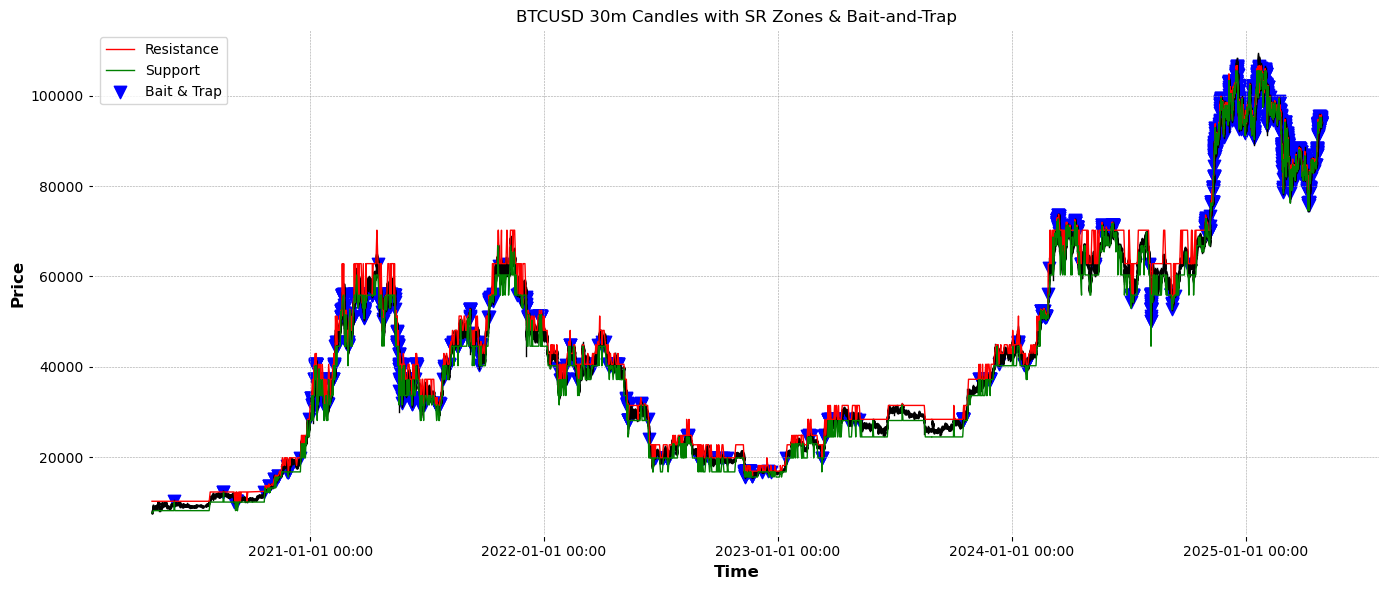

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1) Prepare your OHLC data for plotting
ohlc = df[['open','high','low','close']].copy()
# convert the index to Matplotlib dates
ohlc['time_num'] = mdates.date2num(ohlc.index.to_pydatetime())

# figure out a bar width (60% of the average spacing)
dt = np.mean(np.diff(ohlc['time_num']))
width = dt * 0.6

# 2) Start the plot
fig, ax = plt.subplots(figsize=(14,6))

# 3) Draw each candle
for _, row in ohlc.iterrows():
    t, o, h, l, c = row['time_num'], row['open'], row['high'], row['low'], row['close']
    color = 'green' if c >= o else 'red'
    # High–low wick
    ax.plot([t, t], [l, h], color='black', linewidth=1)
    # Candle body
    rect = plt.Rectangle(
        (t - width/2, min(o, c)),
        width,
        abs(c - o),
        facecolor=color,
        edgecolor='black',
        alpha=0.7
    )
    ax.add_patch(rect)

# 4) Overlay your support/resistance
ax.plot(df.index, df['range_top'],    label='Resistance', color='red',   linewidth=1)
ax.plot(df.index, df['range_bot'],    label='Support',    color='green', linewidth=1)

# 5) Mark your trap events
traps = df.index[df['bait_trap_pattern']]
ax.scatter(
    mdates.date2num(traps),
    df.loc[traps, 'close'],
    marker='v', s=80, color='blue', label='Bait & Trap'
)

# 6) Tidy up
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.title('BTCUSD 30m Candles with SR Zones & Bait-and-Trap')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


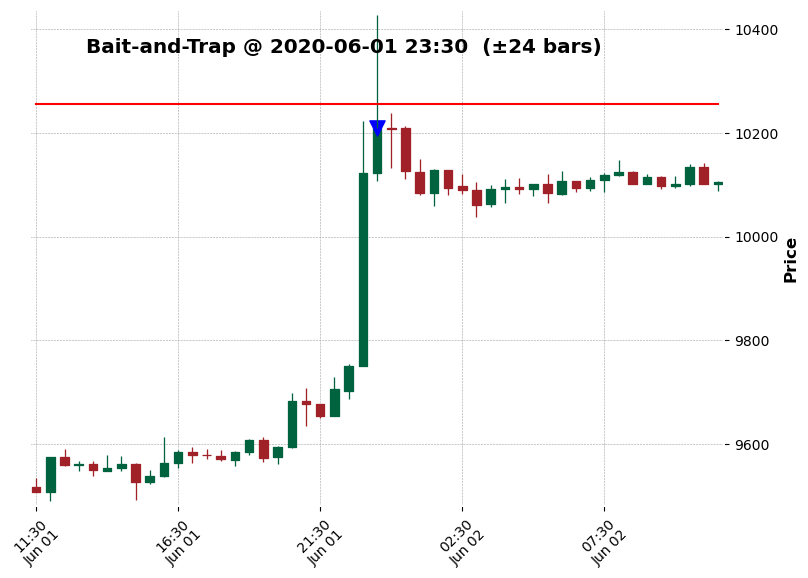

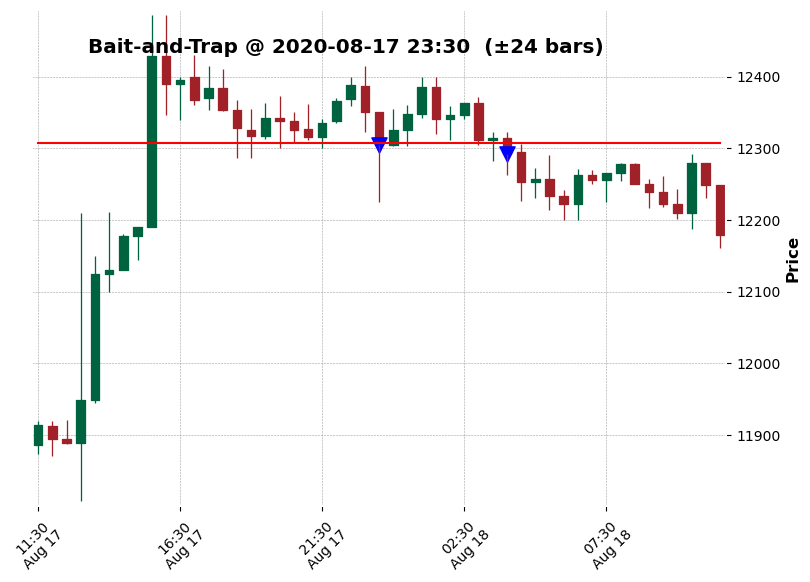

In [21]:
import pandas as pd
import mplfinance as mpf

# 1) Load & re‑index exactly as before
df = pd.read_csv('AnalysisResults/BTCUSD_30m_full_features.csv')
df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time_of_day'])
df.set_index('timestamp', inplace=True)
df.sort_index(inplace=True)

# 2) Grab the first two trap timestamps
trap_times = df.index[df['bait_trap_pattern']][:2]

# how many bars before/after to show
PRE_BARS  = 24   # 24 bars back (12h)
POST_BARS = 24   # 24 bars forward

for ts in trap_times:
    # find the integer position of this timestamp
    pos   = df.index.get_loc(ts)
    start = max(pos - PRE_BARS,  0)
    end   = min(pos + POST_BARS, len(df)-1)

    window = df.iloc[start:end+1]

    # extract flat SR levels (constant across this window)
    res_level = window['range_top'].iloc[0]
    sup_level = window['range_bot'].iloc[0]

    # build the additional plots
    apds = [
        mpf.make_addplot(
            [res_level]*len(window),
            panel=0, color='red',   width=1.5, linestyle='-'
        ),
        mpf.make_addplot(
            [sup_level]*len(window),
            panel=0, color='green', width=1.5, linestyle='-'
        ),
        mpf.make_addplot(
            window['close'].where(window['bait_trap_pattern']),
            type='scatter',
            panel=0,
            marker='v',
            markersize=120,
            color='blue'
        )
    ]

    # plot
    mpf.plot(
        window[['open','high','low','close']],
        type='candle',
        style='charles',
        addplot=apds,
        title=f'Bait-and-Trap @ {ts:%Y-%m-%d %H:%M}  (±{PRE_BARS} bars)',
        datetime_format='%H:%M\n%b %d',
        tight_layout=True,
        volume=False
    )


In [22]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'session', 'date',
       'time_of_day', 'hour', 'minute', 'weekday', 'month', 'range',
       'price_return', 'abs_return', 'ATR_14', 'efficiency', 'range_change',
       'efficiency_change', 'volatility_spike', 'rolling_volatility_std',
       'session_step', 'time_since_session_open', 'price_vs_session_open',
       'prev_session', 'is_session_transition', 'prev_session_return',
       'prev_session_efficiency', 'body_ratio', 'wick_top', 'wick_bottom',
       'prev_high', 'prev_low', 'fakeout_flag', 'engulfing_flag',
       'strong_close', 'prev_return', 'return_direction_match',
       'rolling_return_sum_3', 'rolling_max_high', 'rolling_min_low',
       'relative_to_local_extreme', 'distance_to_prev_high',
       'distance_to_prev_low', 'touch_prev_session_high',
       'touch_prev_session_low', 'is_range_boundary_test',
       'equal_highs_lows_flag', 'return', 'trend_strength',
       'volatility_normalized_return', 'body_wick_ali

In [47]:
# ─────────────────────────────────────────────────────────────────────────────
# Cell: Reverse‑Engineer Base 1 Bait‑and‑Trap (Jupyter Lab)
# ─────────────────────────────────────────────────────────────────────────────

import os
import pandas as pd
import mplfinance as mpf

from modules.base_zone_detector import BaseZoneDetector
from modules.demand_fake_break  import DemandFakeBreakDetector

# 1) Load your enriched BTC 30m CSV
df = pd.read_csv('AnalysisResults/BTCUSD_30m_full_features.csv')

# 2) Rebuild a datetime index from date + time_of_day
df['timestamp'] = pd.to_datetime(
    df['date'].astype(str) + ' ' + df['time_of_day'].astype(str)
)
df.set_index('timestamp', inplace=True)
df.sort_index(inplace=True)

# 3) Detect all bases (no span/height filters so Base 1 is in there)
bzd = BaseZoneDetector(lookback_bars=6, equal_low_tol=0.001, min_pivots=2)
bases = bzd.detect_bases(df)
print(f"→ total bases found: {len(bases)}")

# pick Base 1 (Apr 30 → May 4)
base1 = bases[1]
s, e     = base1['start_idx'], base1['end_idx']
low, high= base1['base_low'], base1['base_high']
print(f"→ Base1 span: {s} → {e}  low={low:.1f}, high={high:.1f}")

# 4) Flag bait‑and‑trap on just Base 1
df2 = DemandFakeBreakDetector(pullback_window=12, buffer_tol=0.001)\
      .flag_patterns(df, [base1])

# ensure we found one
if not df2['trap_entry'].any():
    raise RuntimeError("⚠️ No trap bar found for Base 1 – adjust your params.")

trap_row = df2[df2['trap_entry']].iloc[0]
trap_ts   = trap_row.name
fib1618   = trap_row['fib_target_1.618']
print(f"→ Trap @ {trap_ts}, fib1618={fib1618:.2f}")

# prepare output dir
os.makedirs('AnalysisResults', exist_ok=True)

# 5) Plot CONTEXT: base ±10 bars
ctx_start = max(0, s - 10)
ctx_end   = e + 11
win_ctx   = df.iloc[ctx_start:ctx_end].copy()

ap_ctx = [
    mpf.make_addplot([high]*len(win_ctx), color='red',   width=1.5),
    mpf.make_addplot([low] *len(win_ctx), color='green', width=1.5),
    mpf.make_addplot([fib1618]*len(win_ctx),
                     color='orange', width=1, linestyle='--')
]
mpf.plot(
    win_ctx[['open','high','low','close']],
    type='candle', style='charles', addplot=ap_ctx,
    title=f"Base 1 Context: {df.index[s].strftime('%b %d %H:%M')} → {df.index[e].strftime('%b %d %H:%M')}",
    datetime_format='%m-%d\n%H:%M', volume=False,
    warn_too_much_data=500,
    savefig=dict(fname='AnalysisResults/base1_context.jpg', dpi=300, pad_inches=0.25)
)

# 6) Plot ZOOM: trap ±4 bars
loc = win_ctx.index.get_loc(trap_ts)
z_start = max(0, loc-4)
z_end   = loc+5
win_z   = win_ctx.iloc[z_start:z_end].copy()

ap_z = [
    mpf.make_addplot([high]*len(win_z), color='red',   width=1.5),
    mpf.make_addplot([low] *len(win_z), color='green', width=1.5),
    mpf.make_addplot([fib1618]*len(win_z),
                     color='orange', width=1, linestyle='--'),
    # blue marker for the trap candle
    mpf.make_addplot(
        win_z['low']*0.999,
        type='scatter', marker='v', markersize=100, color='blue',
        data=win_z.assign(is_trap=win_z.index==trap_ts).loc[lambda d:d['is_trap'], ['low']]
    )
]
mpf.plot(
    win_z[['open','high','low','close']],
    type='candle', style='charles', addplot=ap_z,
    title=f"Base 1 Zoom: Trap @ {trap_ts.strftime('%b %d %H:%M')}",
    datetime_format='%H:%M\n%b %d', volume=False,
    warn_too_much_data=100,
    savefig=dict(fname='AnalysisResults/base1_zoom.jpg', dpi=300, pad_inches=0.25)
)

print("→ Saved base1_context.jpg & base1_zoom.jpg in AnalysisResults/")

# ─────────────────────────────────────────────────────────────────────────────


→ total bases found: 30
→ Base1 span: 77 → 260  low=8537.8, high=9203.5


RuntimeError: ⚠️ No trap bar found for Base 1 – adjust your params.

In [27]:
from modules.base_zone_detector import BaseZoneDetector

# Create a detector with tighter settings
bzd = BaseZoneDetector(
    lookback_bars = 6,      # look over the last 6 bars (3 hours)
    equal_low_tol = 0.0005, # ±0.05% “equal‑low” tolerance
    min_pivots     = 3      # require at least 3 touches
)
bases = bzd.detect_bases(df)

print(f"Detected {len(bases)} bases now.")
for i, b in enumerate(bases[:5]):
    s, e = b['start_idx'], b['end_idx']
    print(f"Base {i}: low={b['base_low']:.1f}, high={b['base_high']:.1f}, "
          f"span {df.index[s]} → {df.index[e]}")


Detected 21 bases now.
Base 0: low=8922.5, high=10079.0, span 2020-05-03 06:00:00 → 2020-05-22 04:30:00
Base 1: low=9075.1, high=10428.0, span 2020-05-22 13:30:00 → 2020-07-03 14:30:00
Base 2: low=9202.2, high=9475.0, span 2020-07-07 20:00:00 → 2020-07-11 20:00:00
Base 3: low=9141.6, high=9280.0, span 2020-07-14 04:00:00 → 2020-07-19 06:00:00
Base 4: low=10852.0, high=12486.6, span 2020-07-28 03:30:00 → 2020-10-08 18:30:00


C:\Users\Sarthak\miniconda3\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


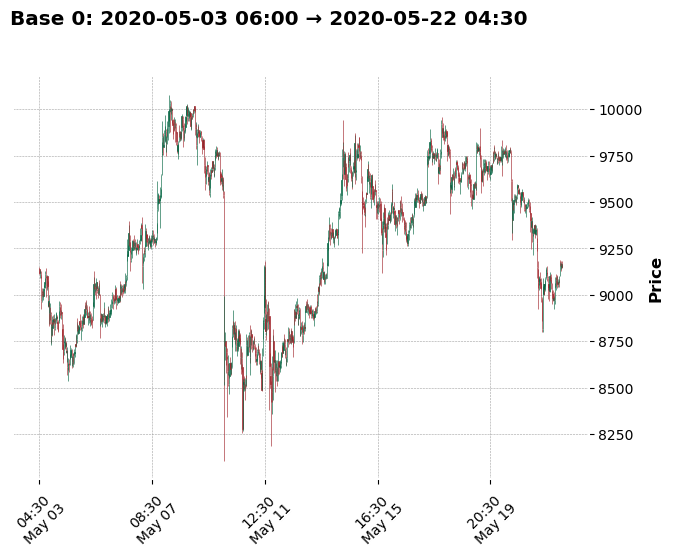

In [37]:
from modules.base_zone_detector import BaseZoneDetector

# capture everything (no span/height filtering)
bzd_all = BaseZoneDetector()
bases_all = bzd_all.detect_bases(df)

# only very compact bases (≤ 24 bars)
bzd_tight = BaseZoneDetector(max_span=24)
bases_tight = bzd_tight.detect_bases(df)

# only “flat” bases less than 0.5 ATR high
bzd_flat = BaseZoneDetector(max_height_atr=0.5)
bases_flat = bzd_flat.detect_bases(df)


In [41]:
import pandas as pd
import mplfinance as mpf

from modules.base_zone_detector     import BaseZoneDetector
from modules.demand_fake_break      import DemandFakeBreakDetector

# 1) Load the CSV (no index)
df = pd.read_csv('./AnalysisResults/BTCUSD_30m_full_features.csv')

# 2) Reconstruct a datetime index from 'date' + 'time_of_day'
df['timestamp'] = pd.to_datetime(
    df['date'].astype(str) + ' ' + df['time_of_day'].astype(str)
)
df.set_index('timestamp', inplace=True)
df.sort_index(inplace=True)

# 3) Ensure ATR_14 exists (needed if you use max_height_atr)
if 'ATR_14' not in df.columns:
    from modules.volatility_features import add_volatility_features
    df = add_volatility_features(df)

# 4) Detect bases with flexible filters
bzd = BaseZoneDetector(
    lookback_bars=6,
    equal_low_tol=0.001,
    min_pivots=2,
    max_span=24,
    max_height_atr=0.5
)
bases = bzd.detect_bases(df)
print(f"Detected {len(bases)} bases")

# 5) Flag bait‑and‑trap + fib targets
df2 = DemandFakeBreakDetector(
    pullback_window=12,
    buffer_tol=0.001
).flag_patterns(df, bases)

# 6) Plot the first 3 bases ±4 bars around each
for i, base in enumerate(bases[:3]):
    s, e = base['start_idx'], base['end_idx']
    window = df.iloc[max(0, s-4) : e+5].copy()

    low, high = base['base_low'], base['base_high']
    # find the 1.618 target if a trap was flagged
    trap_rows = df2[(df2['trap_entry']) & (df2['pattern_id']==i)]
    fib_1618 = float(trap_rows['fib_target_1.618'].iloc[0]) if not trap_rows.empty else None

    addplots = [
        mpf.make_addplot([high]*len(window), color='red',   width=1),
        mpf.make_addplot([low] *len(window), color='green', width=1),
    ]
    if fib_1618:
        addplots.append(
            mpf.make_addplot([fib_1618]*len(window),
                             color='orange', width=1, linestyle='--')
        )

    mpf.plot(
        window[['open','high','low','close']],
        type='candle',
        style='charles',
        addplot=addplots,
        title=f"Base {i}: {df.index[s].strftime('%m-%d %H:%M')} → {df.index[e].strftime('%m-%d %H:%M')}",
        datetime_format='%H:%M\n%b %d',
        volume=False,
        warn_too_much_data=100
    )


Detected 0 bases


In [42]:
from modules.base_zone_detector import BaseZoneDetector

# only lookback and tolerance — no span or height limits
bzd_raw = BaseZoneDetector(
    lookback_bars=6,
    equal_low_tol=0.001,
    min_pivots=2,
    min_span=None,
    max_span=None,
    max_height_atr=None
)

raw_bases = bzd_raw.detect_bases(df)
print(f"Raw bases found (no filters): {len(raw_bases)}")
for i,b in enumerate(raw_bases[:5]):
    s,e = b['start_idx'], b['end_idx']
    print(f" Base {i}: span {(e-s+1)} bars, low={b['base_low']:.0f} → high={b['base_high']:.0f}")


Raw bases found (no filters): 30
 Base 0: span 13 bars, low=7717 → high=7876
 Base 1: span 184 bars, low=8538 → high=9204
 Base 2: span 2960 bars, low=9216 → high=10428
 Base 3: span 497 bars, low=9146 → high=9348
 Base 4: span 52 bars, low=9478 → high=9686


C:\Users\Sarthak\miniconda3\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


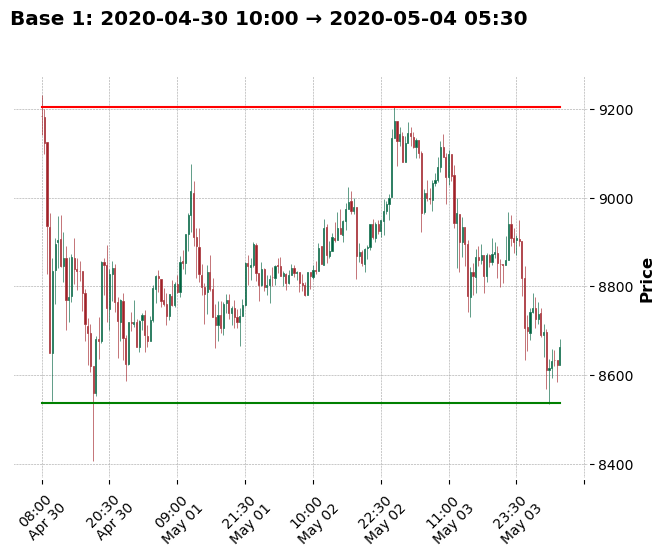

C:\Users\Sarthak\miniconda3\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


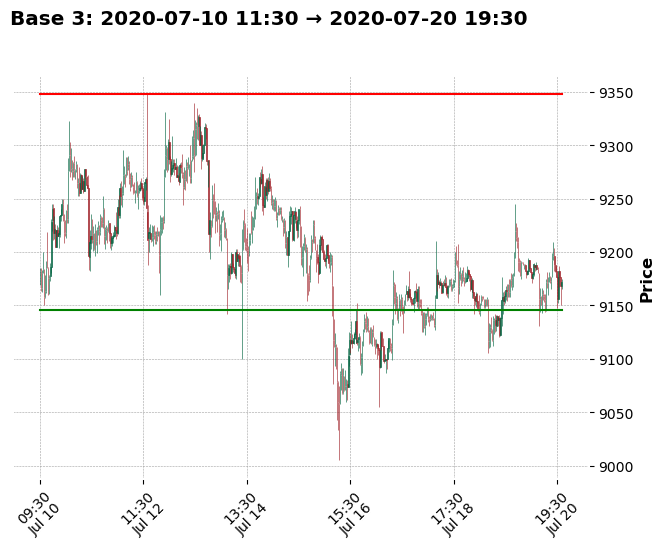

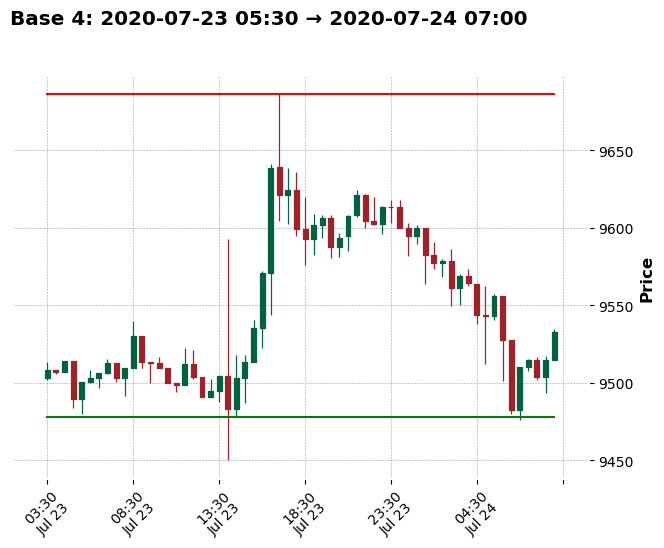

In [43]:
import mplfinance as mpf

candidates = [1, 3, 4]  # pick the indices you want to preview
for i in candidates:
    b   = raw_bases[i]
    s,e = b['start_idx'], b['end_idx']
    # ±4 bars around the actual base span
    window = df.iloc[max(0, s-4) : e+5].copy()
    
    low, high = b['base_low'], b['base_high']
    apds = [
        mpf.make_addplot([high]*len(window), color='red',   width=1.5),
        mpf.make_addplot([low] *len(window), color='green', width=1.5),
    ]
    mpf.plot(
        window[['open','high','low','close']],
        type='candle',
        style='charles',
        addplot=apds,
        title=f"Base {i}: {df.index[s].strftime('%Y-%m-%d %H:%M')} → {df.index[e].strftime('%Y-%m-%d %H:%M')}",
        datetime_format='%H:%M\n%b %d',
        volume=False,
        warn_too_much_data=100
    )


In [45]:
import pandas as pd
import mplfinance as mpf
from modules.base_zone_detector import BaseZoneDetector

# … assume df is already loaded & indexed …

# detect bases (no span/height filters for demo)
bzd       = BaseZoneDetector(lookback_bars=6, equal_low_tol=0.001, min_pivots=2)
raw_bases = bzd.detect_bases(df)

# pick a few to export
for i in [1, 3, 4]:
    b   = raw_bases[i]
    s,e = b['start_idx'], b['end_idx']
    window = df.iloc[max(0, s-4) : e+5].copy()
    low, high = b['base_low'], b['base_high']

    addplots = [
        mpf.make_addplot([high]*len(window), color='red',   width=1.5),
        mpf.make_addplot([low] *len(window), color='green', width=1.5),
    ]

    mpf.plot(
        window[['open','high','low','close']],
        type='candle',
        style='charles',
        addplot=addplots,
        title=f"Base {i}: {df.index[s].strftime('%m-%d %H:%M')} → {df.index[e].strftime('%m-%d %H:%M')}",
        datetime_format='%H:%M\n%b %d',
        volume=False,
        warn_too_much_data=500,
        # ===== save to JPEG at 300 DPI =====
        savefig=dict(
            fname=f'AnalysisResults/base_{i}.jpg',
            dpi=300,
            pad_inches=0.25
        )
    )
    print(f"→ Saved AnalysisResults/base_{i}.jpg")


→ Saved AnalysisResults/base_1.jpg
→ Saved AnalysisResults/base_3.jpg


C:\Users\Sarthak\miniconda3\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


→ Saved AnalysisResults/base_4.jpg


In [52]:
# ─────────────────────────────────────────────────────────────────────────────
# Jupyter Lab Cell: Reverse‑Engineer Base 1 Bait‑and‑Trap with Corrected Scatter
# ─────────────────────────────────────────────────────────────────────────────

import os
import pandas as pd
import mplfinance as mpf

from modules.base_zone_detector import BaseZoneDetector
from modules.demand_fake_break  import DemandFakeBreakDetector

# 1) Load & index your BTC 30 m full‑features CSV
df = pd.read_csv('AnalysisResults/BTCUSD_30m_full_features.csv')
df['timestamp'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time_of_day'].astype(str))
df.set_index('timestamp', inplace=True)
df.sort_index(inplace=True)

# 2) Ensure ATR_14 exists
if 'ATR_14' not in df.columns:
    from modules.volatility_features import add_volatility_features
    df = add_volatility_features(df)

# 3) Detect all bases
bzd   = BaseZoneDetector(lookback_bars=6, equal_low_tol=0.001, min_pivots=2)
bases = bzd.detect_bases(df)
print(f"→ total bases found: {len(bases)}")

# 4) Select Base 1 (the Apr 30 → May 4 zone)
base1 = bases[1]
s, e  = base1['start_idx'], base1['end_idx']
low, high = base1['base_low'], base1['base_high']
print(f"→ Base 1 span: idx {s} → {e}, low={low:.1f}, high={high:.1f}")

# 5) Flag bait‑and‑trap on Base 1 with extended pullback
lookahead = len(df) - e
df2 = DemandFakeBreakDetector(pullback_window=lookahead, buffer_tol=0.001)\
      .flag_patterns(df, [base1])

if not df2['trap_entry'].any():
    raise RuntimeError("⚠️ No trap bar found for Base 1. Adjust parameters.")

trap_row = df2[df2['trap_entry']].iloc[0]
trap_ts   = trap_row.name
fib1618   = trap_row['fib_target_1.618']
print(f"→ Trap found at {trap_ts}, fib target 1.618 = {fib1618:.2f}")

# Prepare output folder
os.makedirs('AnalysisResults', exist_ok=True)

# 6) Plot CONTEXT: base ±10 bars
ctx_start = max(0, s - 10)
ctx_end   = e + 11
win_ctx   = df.iloc[ctx_start:ctx_end].copy()

ap_ctx = [
    mpf.make_addplot([high]   *len(win_ctx), color='red',    width=1.5),
    mpf.make_addplot([low]    *len(win_ctx), color='green',  width=1.5),
    mpf.make_addplot([fib1618]*len(win_ctx), color='orange', width=1, linestyle='--'),
]
mpf.plot(
    win_ctx[['open','high','low','close']],
    type='candle',
    style='charles',
    addplot=ap_ctx,
    title=f"Base 1 Context: {df.index[s].strftime('%b %d %H:%M')} → {df.index[e].strftime('%b %d %H:%M')}",
    datetime_format='%b %d\n%H:%M',
    volume=False,
    warn_too_much_data=500,
    savefig=dict(fname='AnalysisResults/base1_context.jpg', dpi=300, pad_inches=0.25)
)
print("→ Saved AnalysisResults/base1_context.jpg")

# 7) Plot ZOOM: trap ±4 bars and save JPEG
# locate trap position in the full df index
trap_pos = df.index.get_loc(trap_ts)
z_start  = max(0, trap_pos - 4)
z_end    = trap_pos + 5
win_zoom = df.iloc[z_start:z_end].copy()

# prepare scatter series: only the trap low
scatter_series = win_zoom['low'].where(win_zoom.index == trap_ts) * 0.999

ap_zoom = [
    mpf.make_addplot([high]   *len(win_zoom), color='red',    width=1.5),
    mpf.make_addplot([low]    *len(win_zoom), color='green',  width=1.5),
    mpf.make_addplot([fib1618]*len(win_zoom), color='orange', width=1, linestyle='--'),
    mpf.make_addplot(
        data=scatter_series,
        type='scatter',
        marker='v',
        markersize=100,
        color='blue'
    )
]

mpf.plot(
    win_zoom[['open','high','low','close']],
    type='candle',
    style='charles',
    addplot=ap_zoom,
    title=f"Base 1 Zoom: Trap @ {trap_ts.strftime('%b %d %H:%M')}",
    datetime_format='%H:%M\n%b %d',
    volume=False,
    warn_too_much_data=100,
    savefig=dict(fname='AnalysisResults/base1_zoom.jpg', dpi=300, pad_inches=0.25)
)
print("→ Saved AnalysisResults/base1_zoom.jpg")
# ─────────────────────────────────────────────────────────────────────────────


→ total bases found: 30
→ Base 1 span: idx 77 → 260, low=8537.8, high=9203.5
→ Trap found at 2020-05-10 00:00:00, fib target 1.618 = 10280.65
→ Saved AnalysisResults/base1_context.jpg
→ Saved AnalysisResults/base1_zoom.jpg


In [53]:
# 1) Locate the trap bar index
start_idx = df.index.get_loc(trap_ts)

# 2) Slice forward from the trap bar
future = df.iloc[start_idx:]

# 3) Find the first bar whose high ≥ the fib‑1.618 target
hits = future[ future['high'] >= fib1618 ]

if hits.empty:
    print(f"❌ Price never hit the target of {fib1618:.2f} after the trap at {trap_ts}.")
else:
    hit_ts   = hits.index[0]
    hit_idx  = df.index.get_loc(hit_ts)
    n_bars   = hit_idx - start_idx
    minutes  = n_bars * 30
    print(f"✅ Target {fib1618:.2f} was first hit on {hit_ts} "
          f"→ {n_bars} bars later ({minutes} minutes).")


✅ Target 10280.65 was first hit on 2020-06-01 23:30:00 → 1103 bars later (33090 minutes).


🔍 Scanning 30 bases for simple dip+re‑entry traps…
✅ Found 27 traps out of 30 bases.


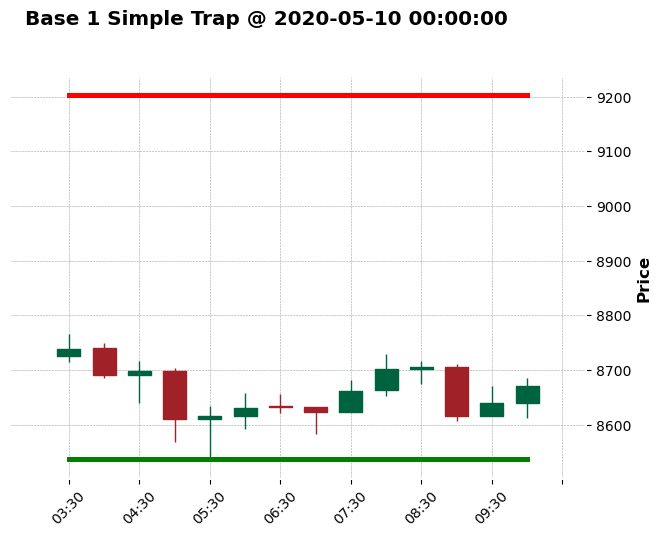

In [58]:
# ─────────────────────────────────────────────────────────────────────────────
# Jupyter cell: Simple Dip+Re‑entry Trap Scan & Plot (fixed with guard)
# ─────────────────────────────────────────────────────────────────────────────

import numpy as np
import pandas as pd
import mplfinance as mpf
from modules.base_zone_detector import BaseZoneDetector

# 1) Assume `df` is your 30 m BTC DataFrame with a datetime index,
#    and open/high/low/close columns present.

# 2) Detect bases
bzd   = BaseZoneDetector(lookback_bars=6, equal_low_tol=0.001, min_pivots=2)
bases = bzd.detect_bases(df)
print(f"🔍 Scanning {len(bases)} bases for simple dip+re‑entry traps…")

# 3) Find “dip + close back in” with tol=0.005
tol   = 0.005
found = []
for pid, base in enumerate(bases):
    low  = base['base_low']
    endp = base['end_idx']
    post = df.iloc[endp+1:]
    mask = (post['low'] <= low * (1+tol)) & (post['close'] >= low)
    if mask.any():
        found.append((pid, post.index[mask][0]))

print(f"✅ Found {len(found)} traps out of {len(bases)} bases.")
if not found:
    raise RuntimeError("No simple traps detected. Try increasing tol or changing lookback_bars.")

# 4) Inspect the first hit
pid, ts = found[0]
base    = bases[pid]
s, e    = base['start_idx'], base['end_idx']
low, high = base['base_low'], base['base_high']

# carve out a window ±4 bars before the end of the base for context
start_ix = max(0, e - 4)
end_ix   = e + 10
window   = df.iloc[start_ix:end_ix].copy()

# build the flat support/resistance lines
ap = [
    mpf.make_addplot([high]*len(window), color='red'),
    mpf.make_addplot([low] *len(window), color='green'),
]

# Only add the scatter if the trap timestamp falls within our window
if ts in window.index:
    # create a full-length series of NaN, then mark the trap low
    scatter = pd.Series(np.nan, index=window.index)
    scatter.loc[ts] = window.loc[ts, 'low'] * 0.999

    ap.append(
        mpf.make_addplot(
            data=scatter,
            type='scatter',
            marker='v',
            markersize=100,
            color='blue',
            panel=0,
            secondary_y=False
        )
    )

# 5) Finally plot
mpf.plot(
    window[['open','high','low','close']],
    type='candle',
    style='charles',
    addplot=ap,
    title=f"Base {pid} Simple Trap @ {ts}",
    volume=False,
    warn_too_much_data=100
)
# ─────────────────────────────────────────────────────────────────────────────


In [59]:
from modules.demand_fake_break import DemandFakeBreakDetector

df2 = DemandFakeBreakDetector(
    pullback_window = len(df),    # search until the end
    buffer_tol      = 0.002,      # 0.2% leeway on the base_low
).flag_patterns(df, bases)

# Now filter for only the “true” traps:
true_traps = df2[(df2['fake_break_high']) & (df2['trap_entry'])]
print(f"→ Genuine bait‑and‑trap patterns found: {len(true_traps)}")
display(true_traps[['pattern_id','base_low','base_high','trap_entry','fib_target_1.618']])


→ Genuine bait‑and‑trap patterns found: 1


,pattern_id,base_low,base_high,trap_entry,fib_target_1.618
timestamp,,,,,
2023-11-27 10:30:00,23,36924.4025,37987.0,True,39706.282755


In [62]:
# Reload your data & patterns
import pandas as pd
from modules.bait_trap_finder import BaitTrapFinder

df = pd.read_csv('AnalysisResults/BTCUSD_30m_full_features.csv')
df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time_of_day'])
df.set_index('timestamp', inplace=True)
df.sort_index(inplace=True)

finder = BaitTrapFinder(
    lookback_bars     = 6,
    equal_low_tol     = 0.001,
    min_pivots        = 2,
    fake_break_tol    = 0.001,
    reentry_buffer    = 0.002,
    max_pullback_bars = 96
)
patterns = finder.find_patterns(df)

# Now re‑run the plotting cell from before


In [63]:
print(f"Detected {len(patterns)} bait‑and‑trap setups")
patterns.head()

Detected 2 bait‑and‑trap setups


,pattern_id,base_low,base_high,start_ts,end_ts,trap_ts,fib_target,hit_target,bars_to_target,target_ts
0,22,34940.955,35410.00,2023-11-05 02:00:00,2023-11-06 13:30:00,2023-11-07 18:00:00,35699.86981,True,5,2023-11-07 20:30:00
1,29,78772.785,80849.98,2025-04-08 01:00:00,2025-04-08 10:00:00,2025-04-09 17:00:00,82133.68651,True,1,2025-04-09 17:30:00
